In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ev = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10


In [3]:
ev.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

### Exploratory Data Analysis

In [4]:
ev['City'].value_counts()

Seattle           21665
Bellevue           6376
Redmond            4588
Vancouver          4363
Kirkland           3882
                  ...  
Hamilton              1
Kapowsin              1
Tempe                 1
Annapolis             1
Smiths Station        1
Name: City, Length: 647, dtype: int64

In [5]:
ev['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            94118
Plug-in Hybrid Electric Vehicle (PHEV)    27860
Name: Electric Vehicle Type, dtype: int64

In [6]:
ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         59179
Eligibility unknown as battery range has not been researched    47417
Not eligible due to low battery range                           15382
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

#### Total number of Battery Electric Vehicles

In [7]:
bev_total = ev['Electric Vehicle Type'].value_counts()['Battery Electric Vehicle (BEV)']
bev_total

94118

#### Total number of Plug-in Hybrid Electric Vehicles

In [8]:
phev_total = ev['Electric Vehicle Type'].value_counts()['Plug-in Hybrid Electric Vehicle (PHEV)']
phev_total

27860

#### Number of Clean Alternative Fuel Vehicle Eligible in both BEVs and PHEVs

In [9]:
bev_cl = len(ev[(ev['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') & (ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible')])
bev_cl

46692

In [10]:
phev_cl = len(ev[(ev['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)') & (ev['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible')])
bev_cl

46692

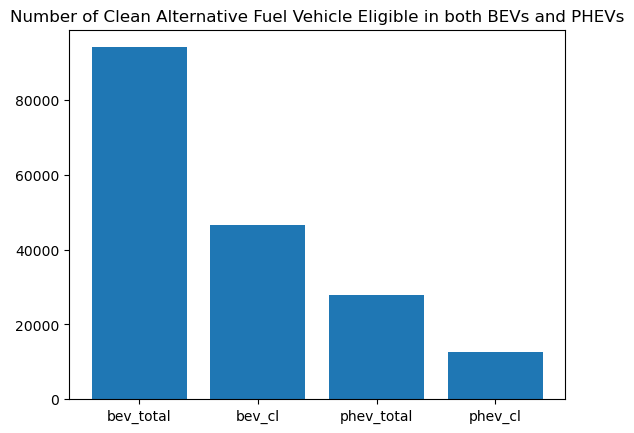

In [27]:
plt.bar(['bev_total', 'bev_cl', 'phev_total', 'phev_cl'], [bev_total, bev_cl, phev_total, phev_cl])
plt.title('Number of Clean Alternative Fuel Vehicle Eligible in both BEVs and PHEVs')
plt.show()

In [12]:
ev['State'].value_counts()

WA    121681
CA        77
VA        38
MD        27
TX        19
CO        10
NC         9
AZ         8
CT         7
NV         7
IL         7
SC         6
GA         6
DC         5
NY         5
FL         5
NJ         5
NE         4
HI         4
LA         4
KS         4
MA         3
MO         3
AR         3
OR         3
PA         3
AL         2
TN         2
ID         2
OH         2
WY         2
UT         2
BC         2
NM         1
DE         1
AK         1
IN         1
MS         1
WI         1
NH         1
MN         1
RI         1
KY         1
OK         1
Name: State, dtype: int64

#### Checking the different make of vehicles in the dataset

In [13]:
ev['Make'].value_counts()

TESLA                   56116
NISSAN                  12938
CHEVROLET               10775
FORD                     6571
BMW                      5350
KIA                      4763
TOYOTA                   4527
VOLKSWAGEN               3171
AUDI                     2460
VOLVO                    2429
CHRYSLER                 1885
HYUNDAI                  1821
JEEP                     1677
RIVIAN                   1253
PORSCHE                   908
FIAT                      809
HONDA                     798
MINI                      699
POLESTAR                  624
MERCEDES-BENZ             616
MITSUBISHI                592
SMART                     272
JAGUAR                    220
LINCOLN                   186
SUBARU                    152
CADILLAC                  109
LUCID MOTORS              106
LEXUS                      45
LAND ROVER                 38
GENESIS                    35
FISKER                     17
AZURE DYNAMICS              7
TH!NK                       3
WHEEGO ELE

<AxesSubplot:title={'center':'Distribution of different make of the vehicles in the dataset'}>

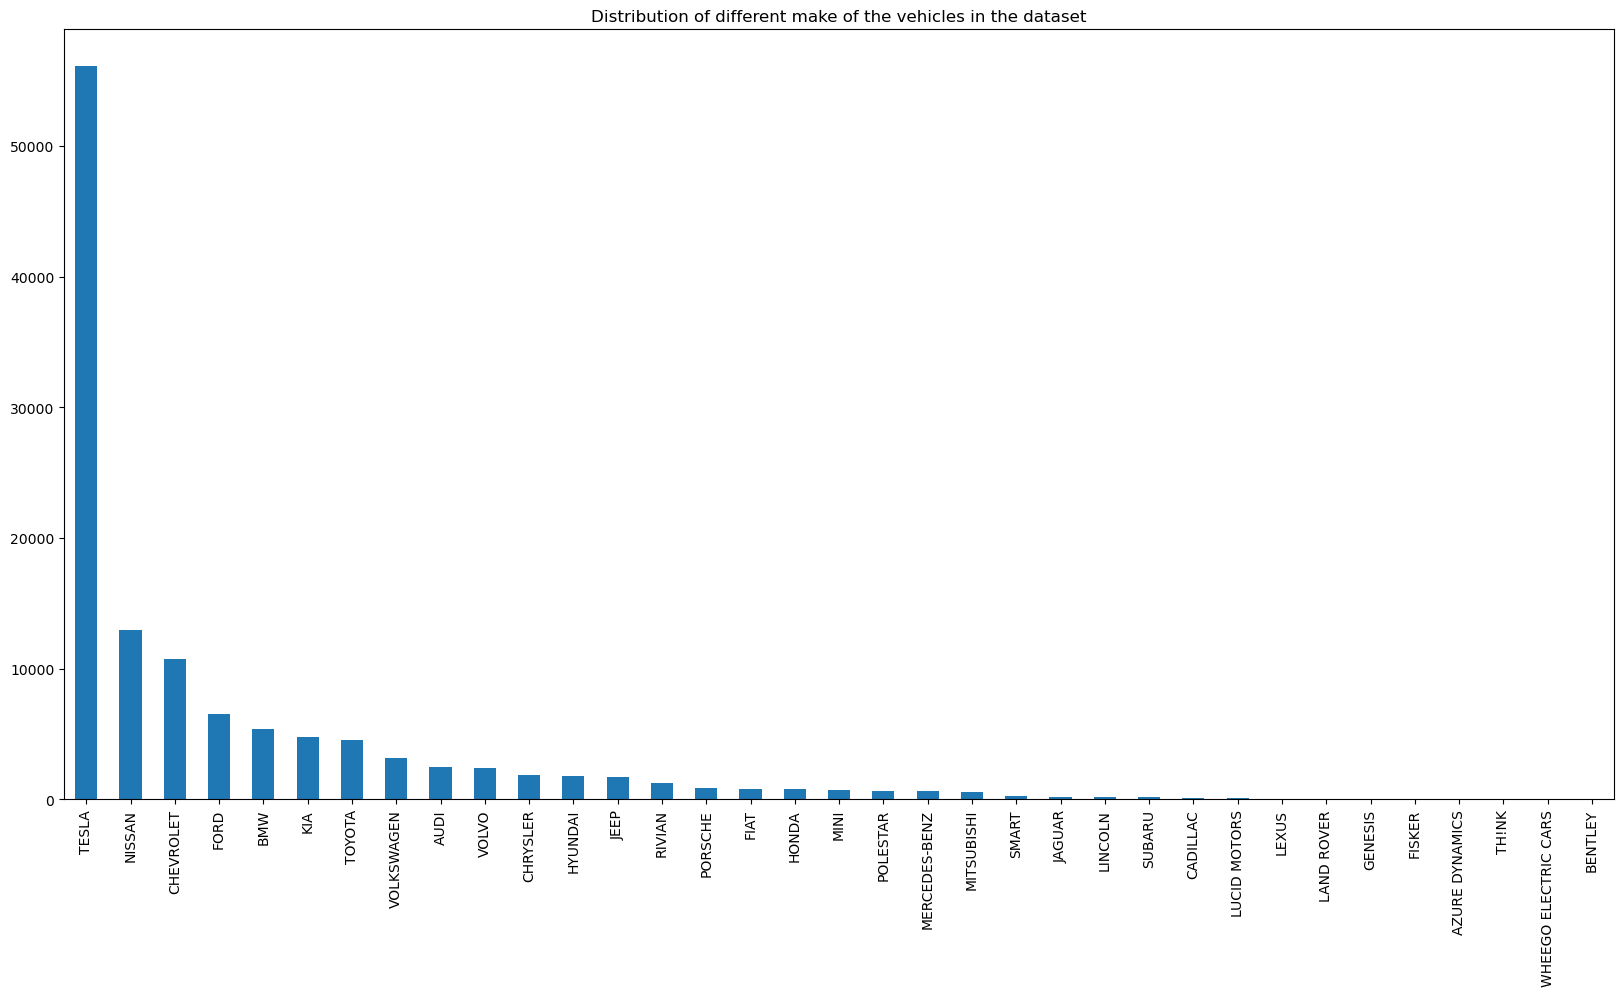

In [28]:
ev['Make'].value_counts().plot(kind='bar', figsize=(20,10), title='Distribution of different make of the vehicles in the dataset')

In [29]:
# Confirming that the DOL Vehicle ID is unique for each vehicle
ev['DOL Vehicle ID'].duplicated().sum()

0

#### Checking for outliers in the Electric Range column

<AxesSubplot:xlabel='Electric Range', ylabel='DOL Vehicle ID'>

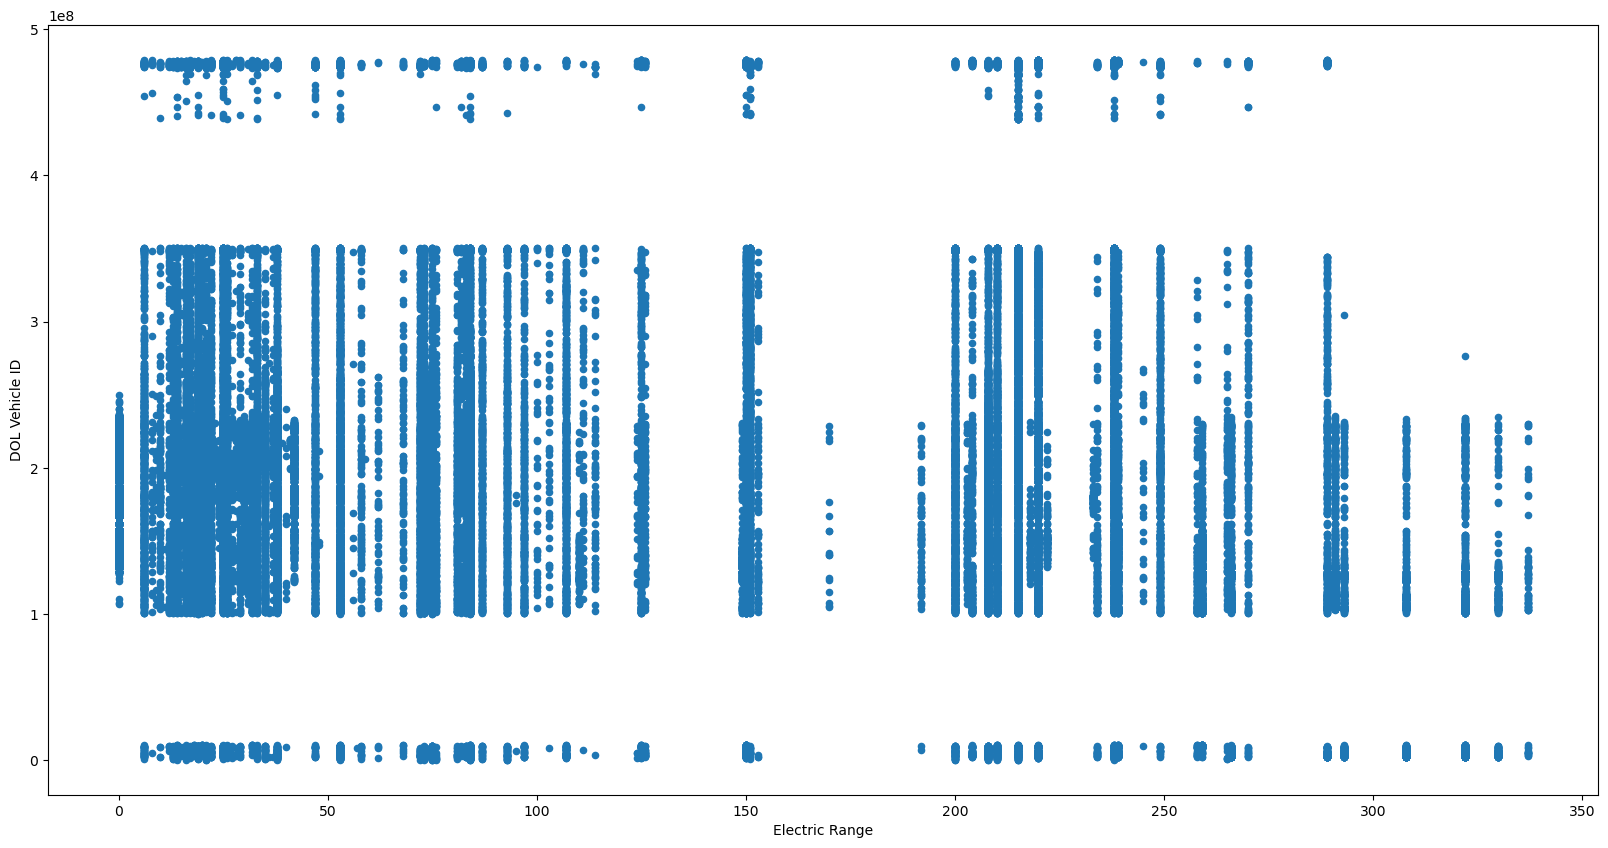

In [30]:
ev[['DOL Vehicle ID', 'Electric Range']].plot(kind='scatter', x='Electric Range', y='DOL Vehicle ID', figsize=(20,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x248820e45b0>,
 'caps': [<matplotlib.lines.Line2D at 0x248820e4b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x248820e42e0>],
 'medians': [<matplotlib.lines.Line2D at 0x24882249130>],
 'fliers': [<matplotlib.lines.Line2D at 0x24882249400>],
 'means': []}

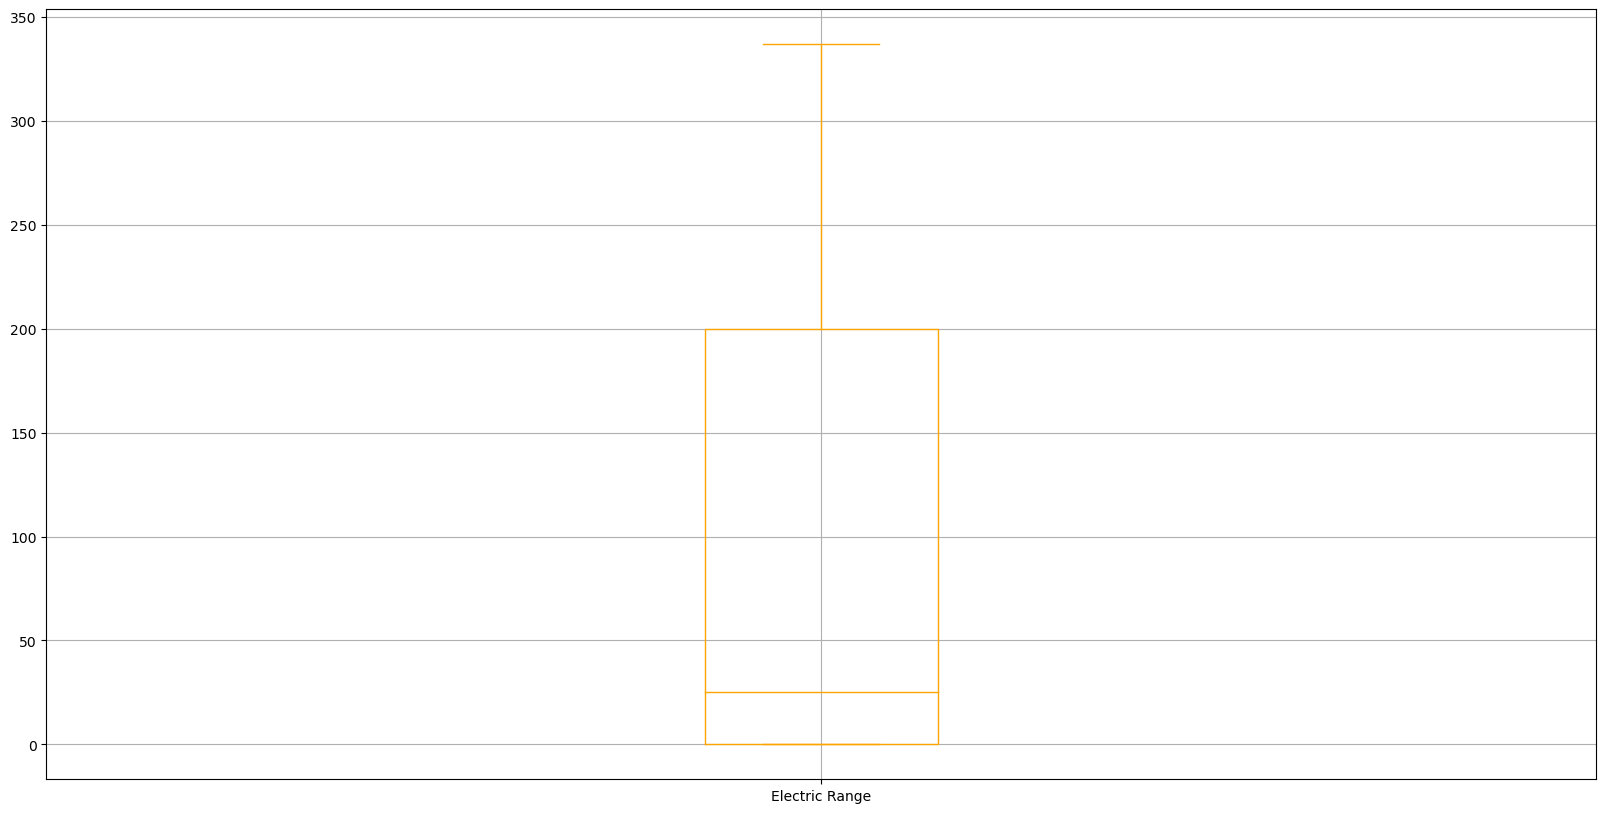

In [31]:
ev.boxplot(column='Electric Range', color='orange', figsize=(20,10), return_type='dict')

#### Comparing the average Electric Range between BEVs and PHEVs

In [32]:
ev.groupby('Electric Vehicle Type')['Electric Range'].mean()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            96.233059
Plug-in Hybrid Electric Vehicle (PHEV)    30.858579
Name: Electric Range, dtype: float64

#### The Distribution of the Model Year of the vehicles in the dataset

In [33]:
ev['Model Year'].value_counts()

2022    27742
2021    18494
2018    14344
2020    10943
2019    10424
2023     9997
2017     8570
2016     5682
2015     4944
2013     4623
2014     3636
2012     1681
2011      833
2010       25
2008       22
2000        9
1999        4
2002        2
1997        1
2003        1
1998        1
Name: Model Year, dtype: int64

<AxesSubplot:title={'center':'Model Year'}>

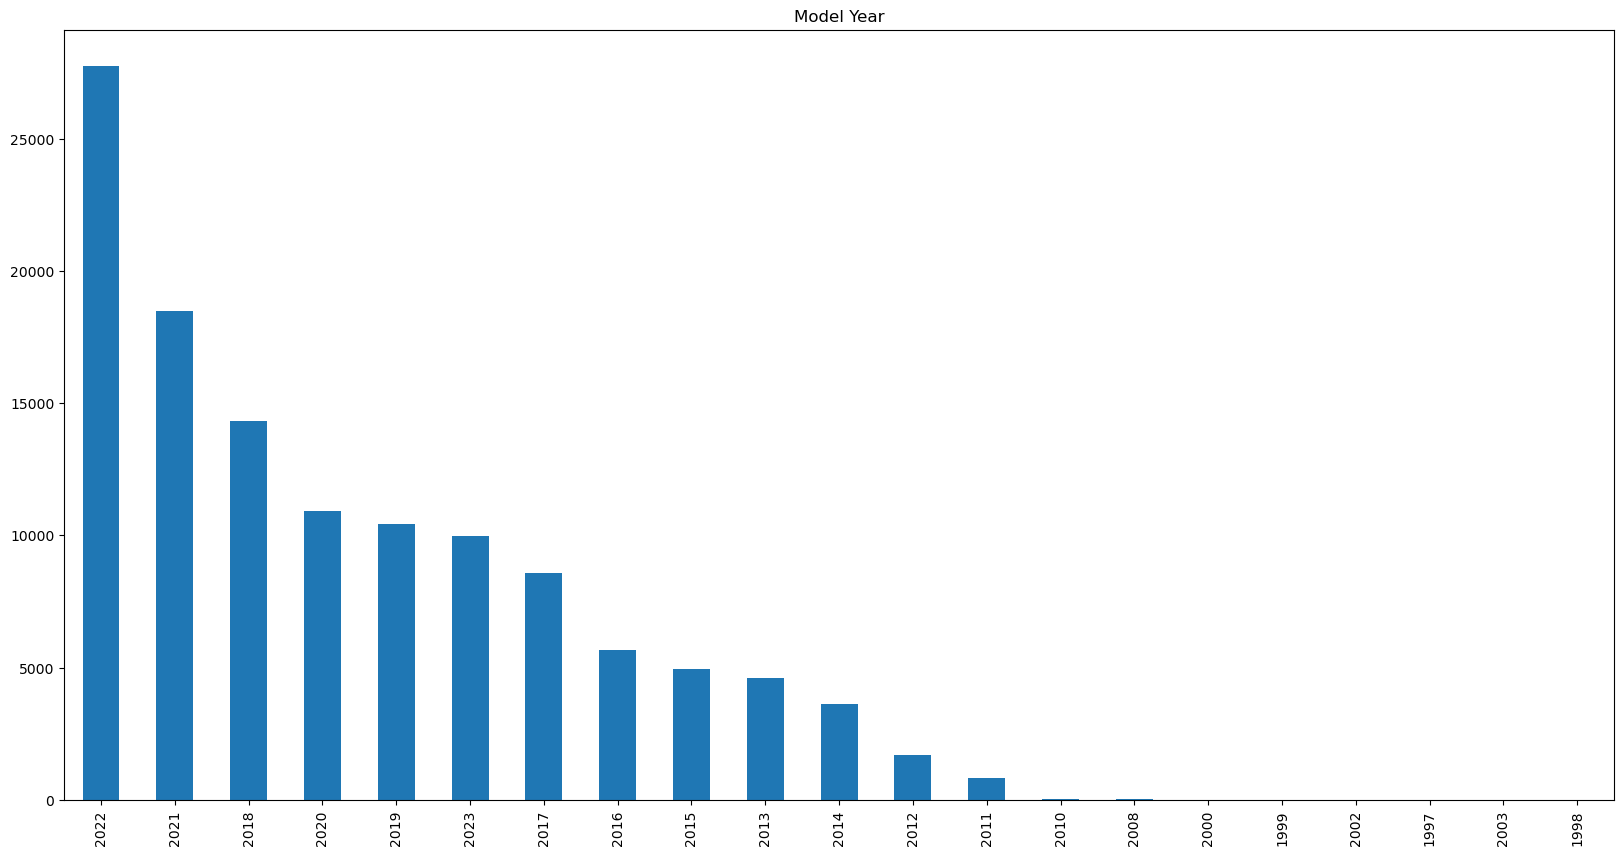

In [35]:
ev['Model Year'].value_counts().plot(kind='bar', figsize=(20,10), title='Model Year')

In [36]:
# Checking which make has the best average Electric Range
ev.groupby(['Make']).mean().sort_values('Electric Range', ascending=False)

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Make,,,,,,,
JAGUAR,98256.390909,2019.645455,207.409091,0.000000,27.977273,1.664142e+08,5.303979e+10
TESLA,98123.401005,2020.108115,109.984799,2043.670254,30.361921,2.037640e+08,5.296291e+10
CHEVROLET,98250.027378,2017.672761,102.222552,0.000000,27.761015,2.050614e+08,5.300022e+10
WHEEGO ELECTRIC CARS,98710.000000,2010.000000,100.000000,32995.000000,18.666667,2.218566e+08,5.306103e+10
TH!NK,98293.666667,2011.000000,100.000000,0.000000,36.000000,2.597504e+08,5.303902e+10
NISSAN,98199.410883,2016.421935,88.174911,0.000000,30.302205,1.977515e+08,5.301291e+10
FIAT,98223.622991,2015.446230,85.631644,0.000000,30.784653,2.071500e+08,5.299461e+10
KIA,98237.148856,2020.369515,63.587445,4357.054377,28.758621,1.992595e+08,5.300615e+10
SMART,98297.680147,2015.573529,62.297794,0.000000,29.985294,2.101100e+08,5.304118e+10


#### Analysing the different make of the vehicles in the dataset

array([[<AxesSubplot:title={'center':'Clean Alternative Fuel Vehicle Eligible'}>,
        <AxesSubplot:title={'center':'Eligibility unknown as battery range has not been researched'}>],
       [<AxesSubplot:title={'center':'Not eligible due to low battery range'}>,
        <AxesSubplot:>]], dtype=object)

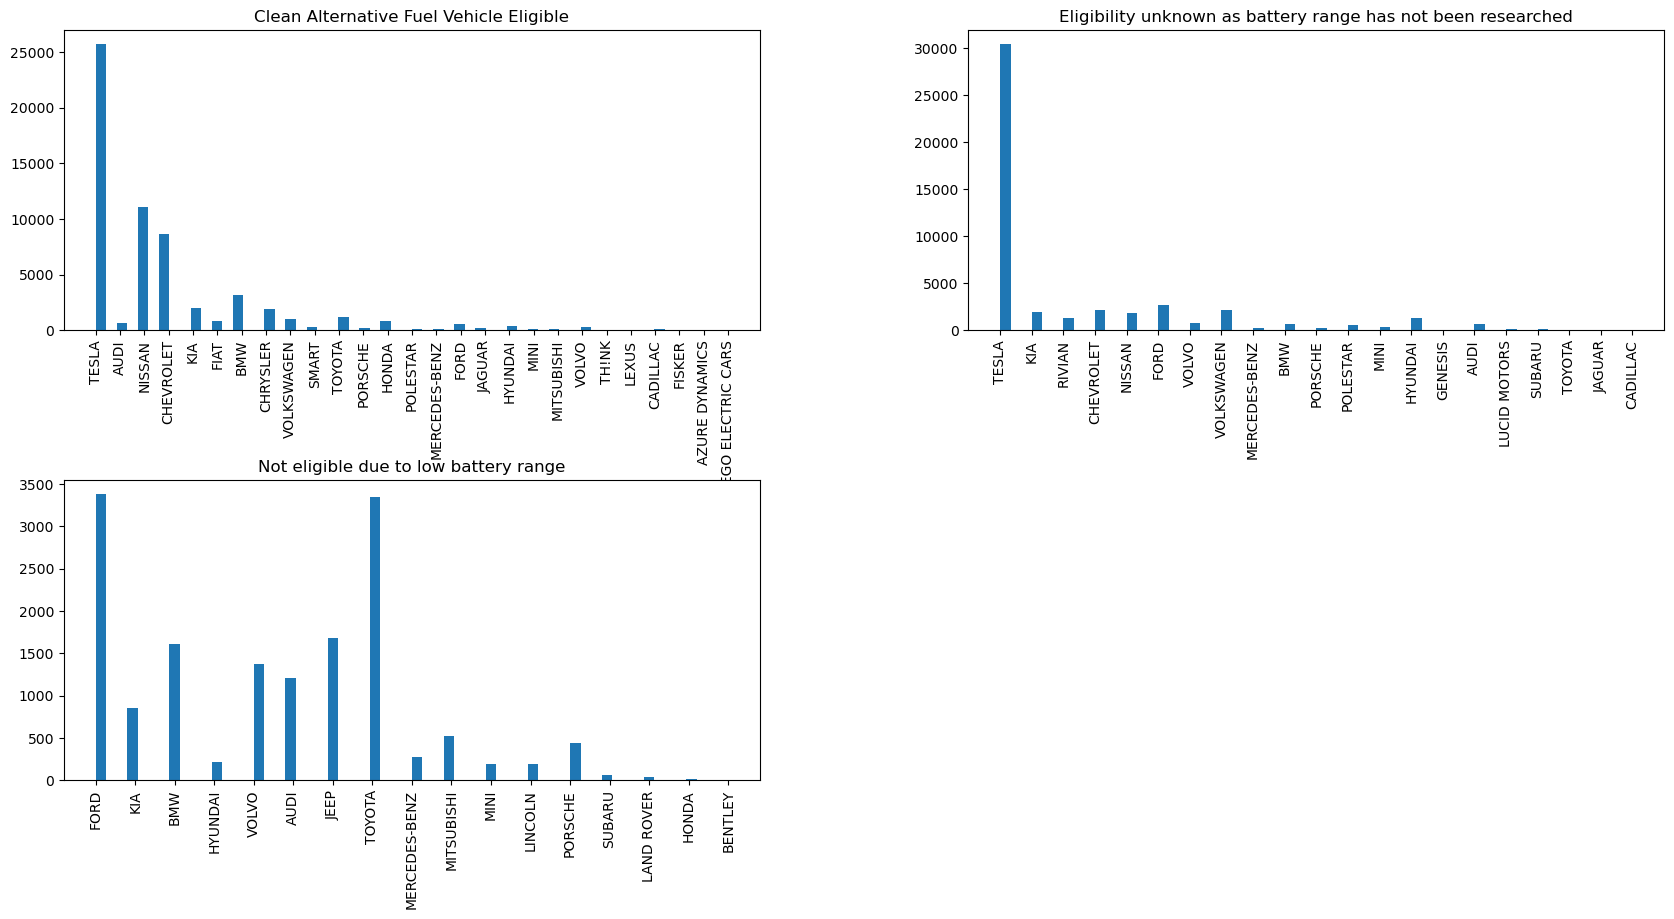

In [38]:
ev.hist(column='Make', by='Clean Alternative Fuel Vehicle (CAFV) Eligibility', figsize=(20,10), bins=60)

array([<AxesSubplot:title={'center':'Battery Electric Vehicle (BEV)'}>,
       <AxesSubplot:title={'center':'Plug-in Hybrid Electric Vehicle (PHEV)'}>],
      dtype=object)

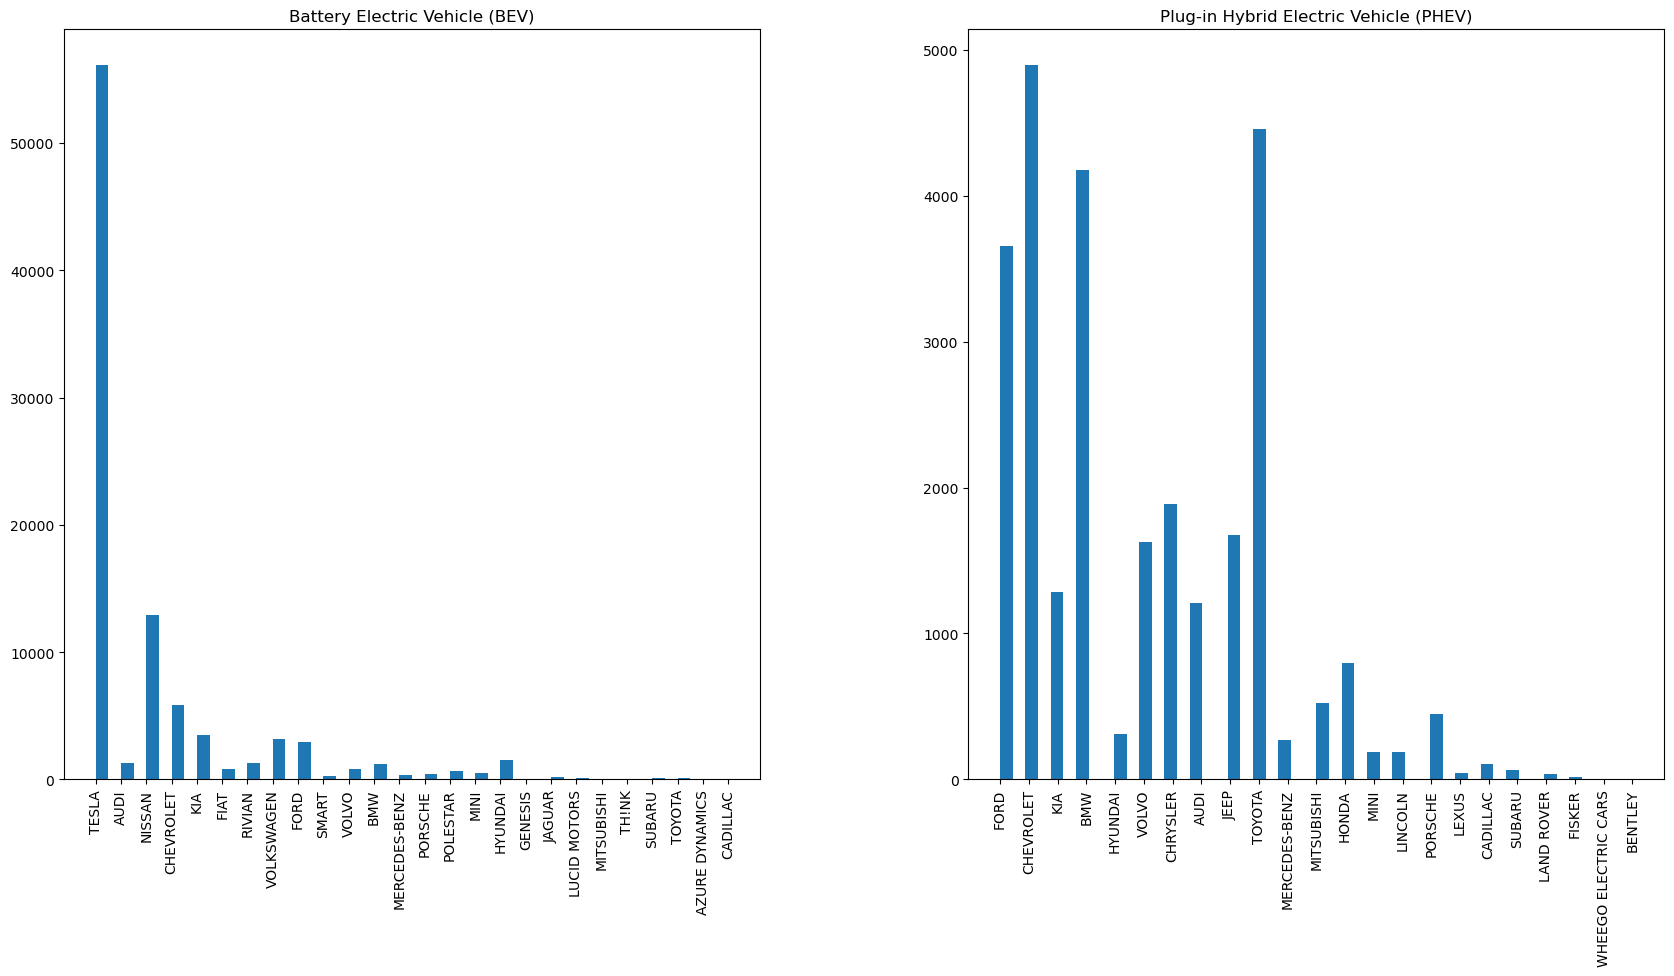

In [23]:
ev.hist(column='Make', by='Electric Vehicle Type', figsize=(20,10), bins=50)

<AxesSubplot:>

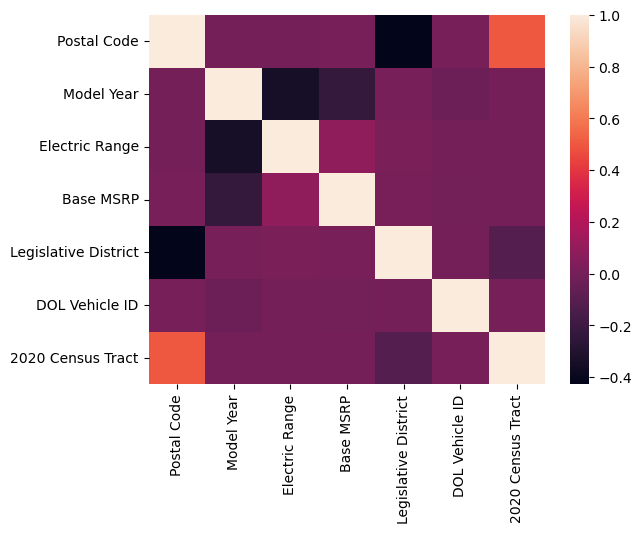

In [24]:
sns.heatmap(ev.corr())

In [25]:
ev.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,121976.000000,121978.00000,121978.000000,121978.000000,121681.000000,1.219780e+05,1.219760e+05
mean,98159.128451,2019.30890,81.301407,1627.059798,29.738760,2.029409e+08,5.297007e+10
std,2602.756790,2.95635,100.890849,10267.478923,14.737141,8.979138e+07,1.659161e+09
min,1730.000000,1997.00000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.00000,0.000000,0.000000,18.000000,1.523397e+08,5.303301e+10
50%,98121.000000,2020.00000,25.000000,0.000000,34.000000,1.967532e+08,5.303303e+10
75%,98370.000000,2022.00000,200.000000,0.000000,43.000000,2.258338e+08,5.305307e+10
max,99701.000000,2023.00000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10
